## 1. Importing the Required Libraries

In [104]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

##2. Create an Object of the Dataset

In [3]:
df = pd.read_csv('day.csv')

##3. Understanding the Dataset

In [4]:
# Viewing the first few rows to understand our dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Understanding the size of the dataset that we're dealing with
df.shape

(730, 16)

In [6]:
# Understanding the number of unique values within variables
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [7]:
# Check the dataset for null and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Understanding how the data is spread out
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Understanding the data types of columns
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# Checking whether there are any missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###Based on the above output, we know that there aren't any missing values which we need to handle.

##4. Data Preparation

In [11]:
# Dropping unimportant columns
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Creating a copy of the dataset, dropping duplicate values (if any), and then
# comparing it to the original dataset to check how many values have been dropped.
df_copy = df.copy()
df_copy.drop_duplicates(subset=None, inplace=True)
df.shape

(730, 12)

In [13]:
# Original dataset shape
df.shape

(730, 12)

###Since shape of dataset is the same, we can conclude that there aren't any duplicate values. Therefore, we can continue working on our original dataframe (df) without making any changes.

In [14]:
# Converting the season, mnth, weekday, and weathersit columns into categorical variables (to avoid any bias)
df['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace=True)
df['mnth'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], inplace=True)
df['weathersit'].replace([1, 2, 3], ['Clear', 'Misty_n_cloudy', 'Light_snow_n_rain'], inplace=True)

# View the data again after making the changes
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty_n_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty_n_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


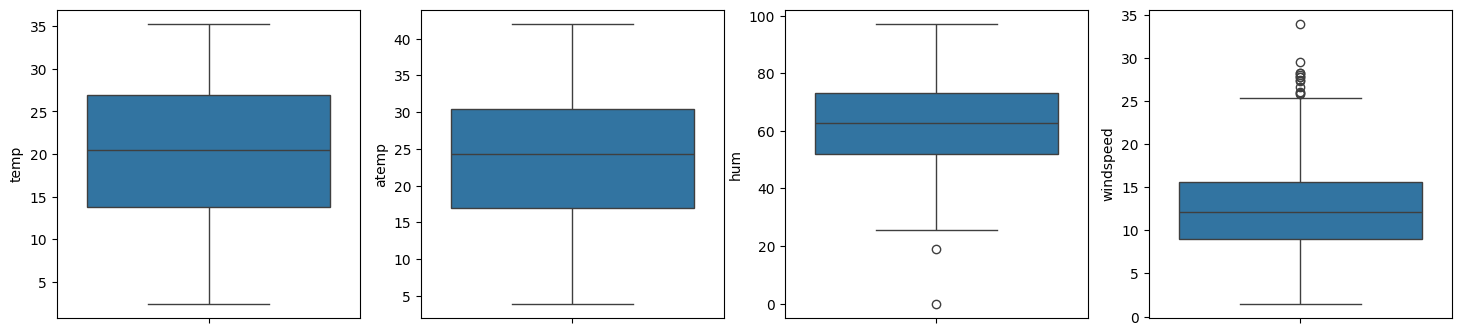

In [15]:
# Draw box plots for indepent variables with continuous values to check for outliers
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

###We can observe that there aren't any outliers that we need to worry about based on the above box plots.

<Figure size 1500x3000 with 0 Axes>

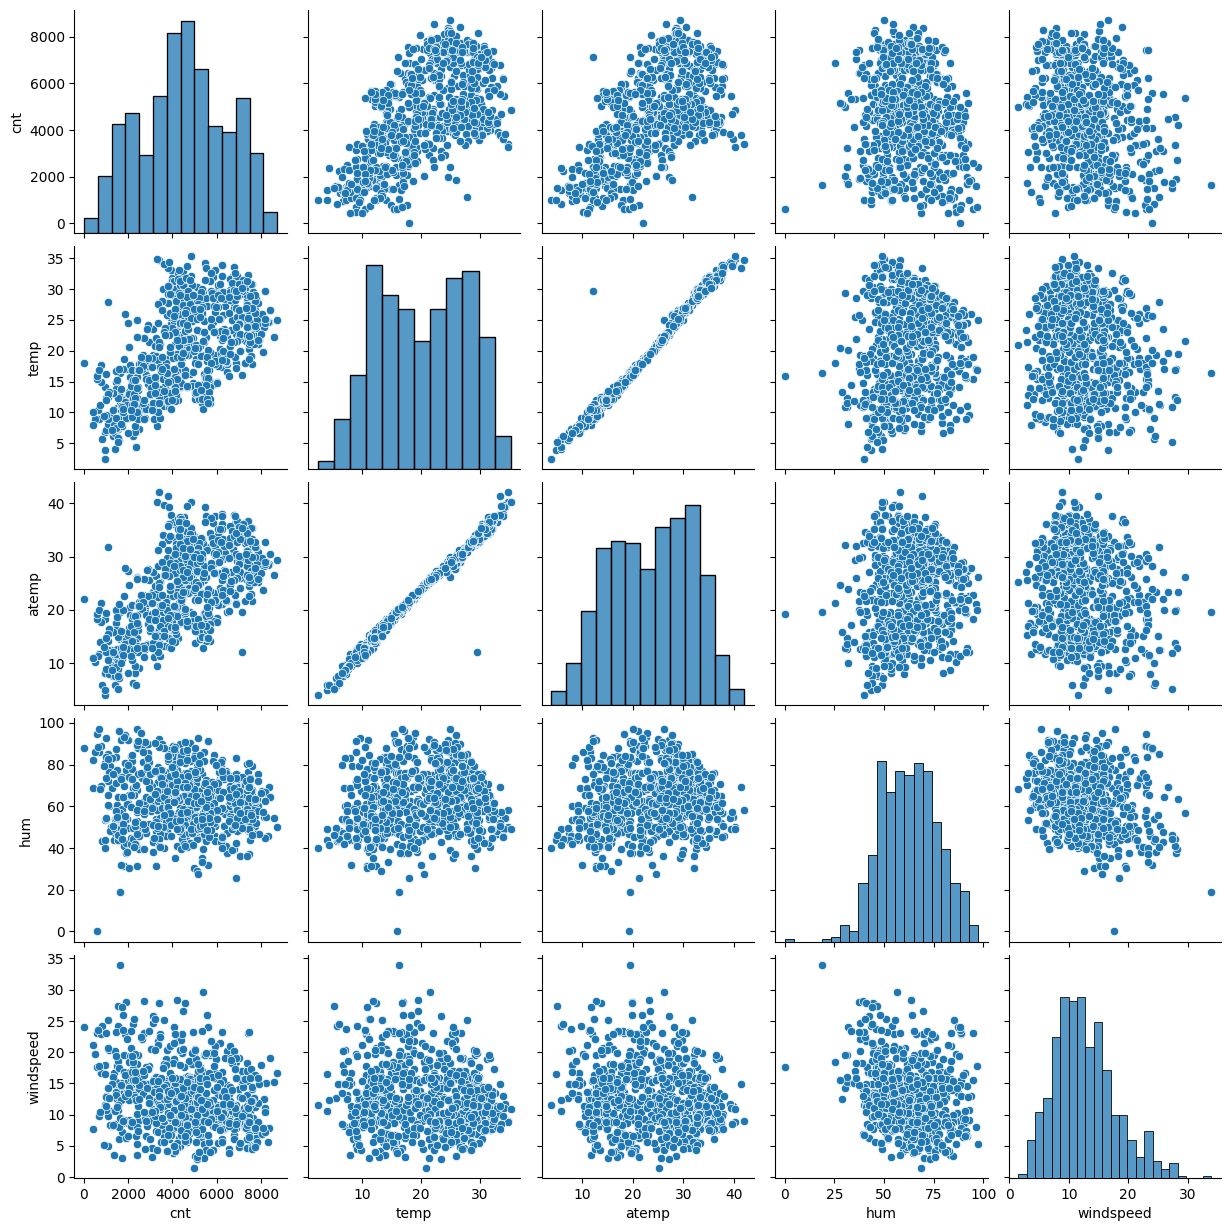

In [16]:
# Checking for linear relationship between some variables
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Based on the above plots, we can conclude that 'temp' and 'atemp' are highly correlated with eachother as well as with cnt, our target variable.

<Figure size 2000x1500 with 0 Axes>

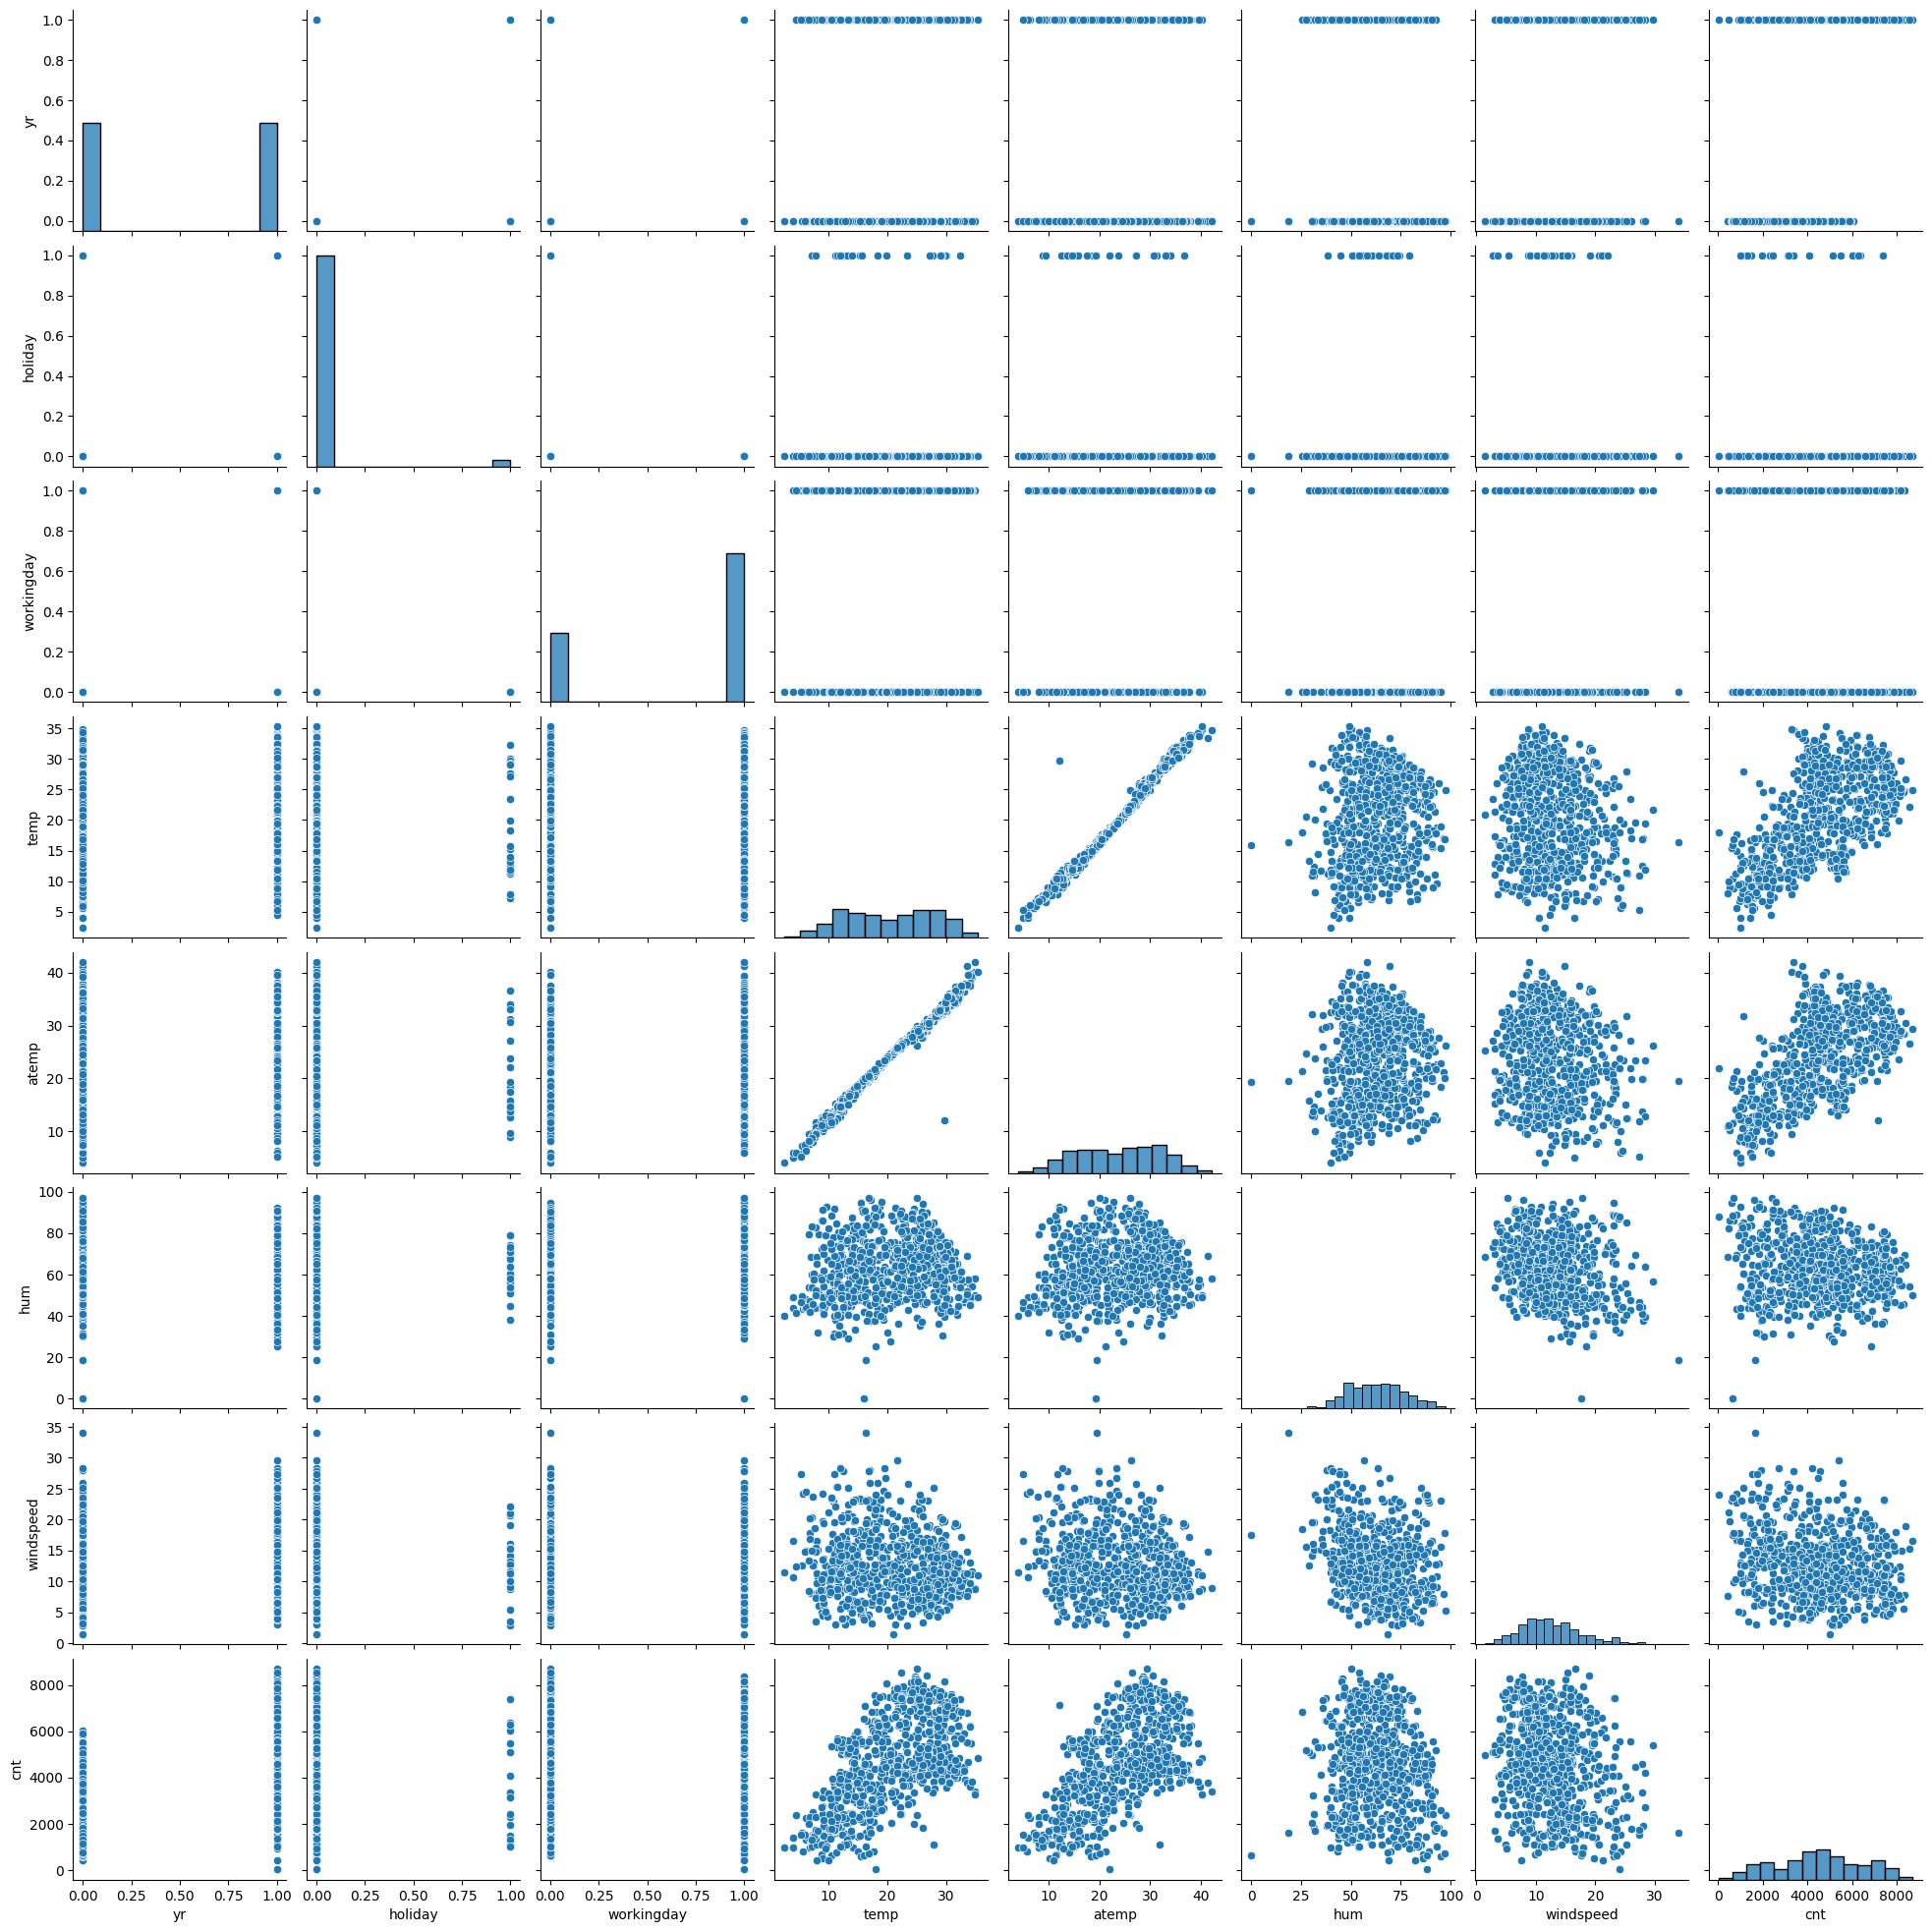

In [17]:
# Visualizing the entire dataset to find correlations among all numeric variables
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

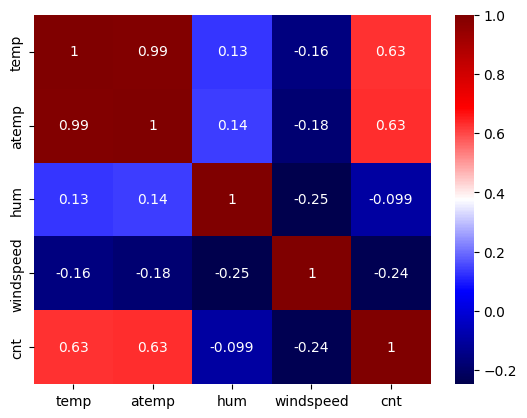

In [18]:
# Now as we know that temp and atemp are highly correlated with eachother, we need to check by how much are they exactly correlated

sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='seismic', annot = True)
plt.show()

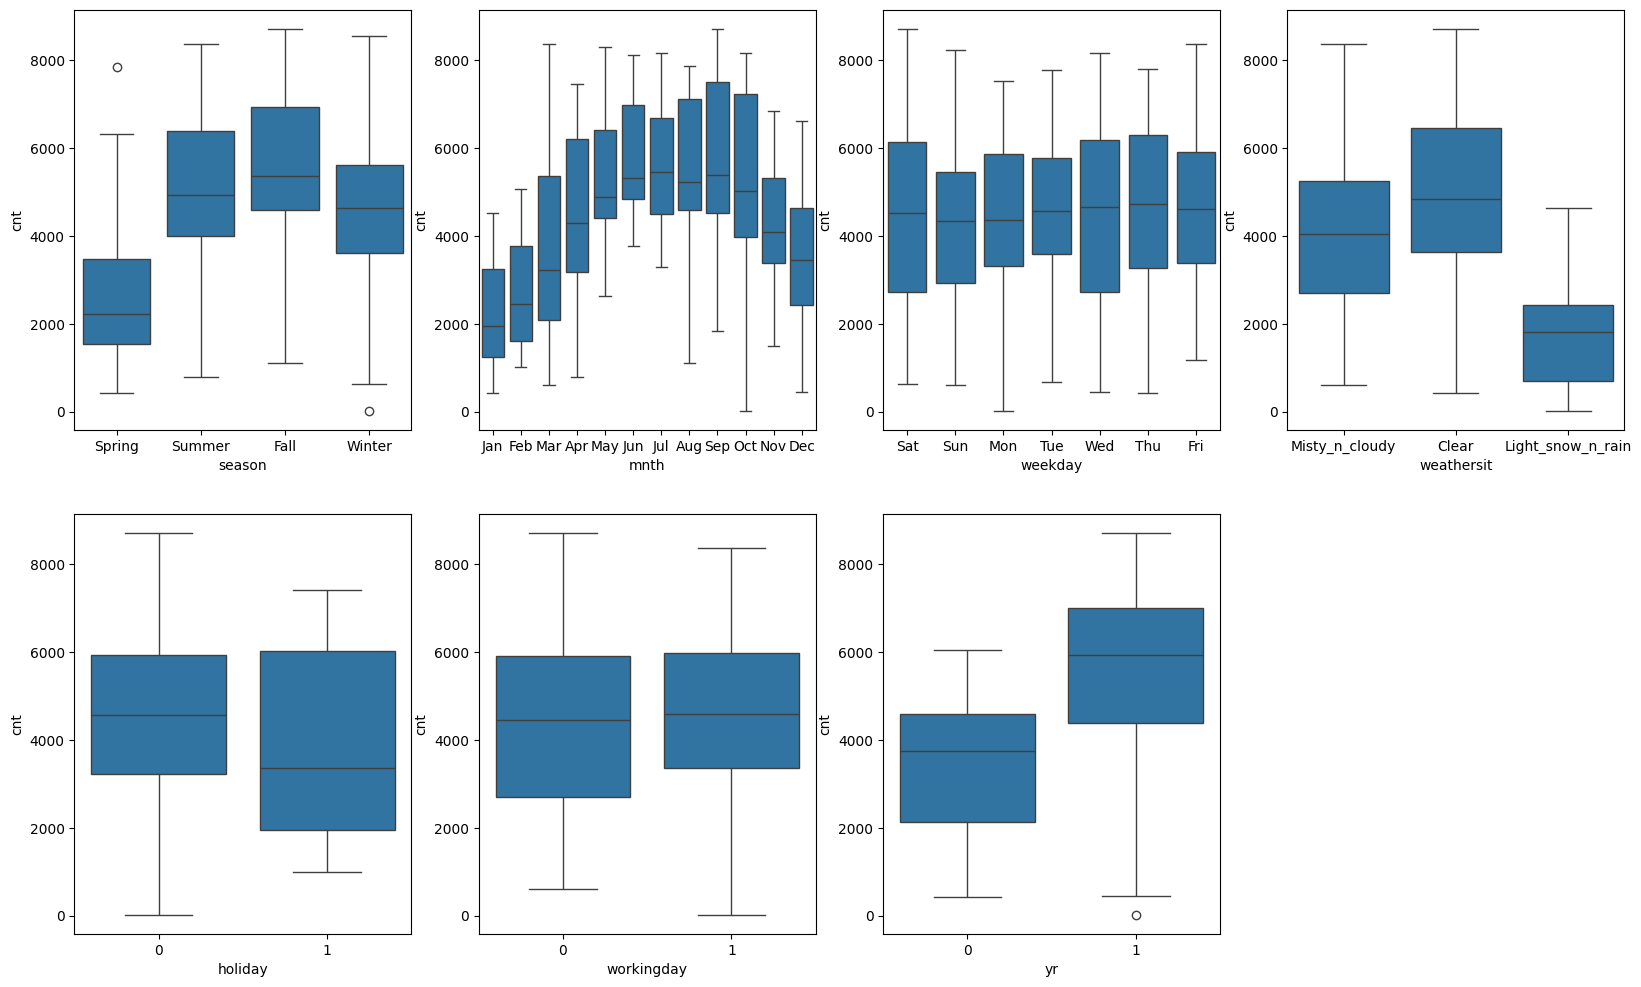

In [19]:
# Visualizing categorical variables against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

In [20]:
# Creating dummy variables for categorical variables (as ML models require numerical values for computation)

df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True, dtype=int)
df = pd.get_dummies(data=df,columns=["weathersit"], dtype=int)
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light_snow_n_rain',
       'weathersit_Misty_n_cloudy'],
      dtype='object')

In [21]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_snow_n_rain,weathersit_Misty_n_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


#5. Train-Test-Split

In [22]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_snow_n_rain,weathersit_Misty_n_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


In [23]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light_snow_n_rain',
       'weathersit_Misty_n_cloudy'],
      dtype='object')

In [24]:
# Assign the Target Variable 'cnt' to y
y=df.pop('cnt')
print(y)

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64


In [25]:
# Checking the updated df dataset
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light_snow_n_rain',
       'weathersit_Misty_n_cloudy'],
      dtype='object')

In [26]:
# Assign the remaining dataset to the variable 'X'
X = df

In [27]:
# Running train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

In [28]:
# Checking the train and test set size
print(X_train.shape)
print(X_test.shape)

(510, 30)
(219, 30)


In [29]:
# Normalizing (min-max scaling) continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_snow_n_rain,weathersit_Misty_n_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.243137,0.245098,0.24902,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.429398,0.430568,0.43287,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


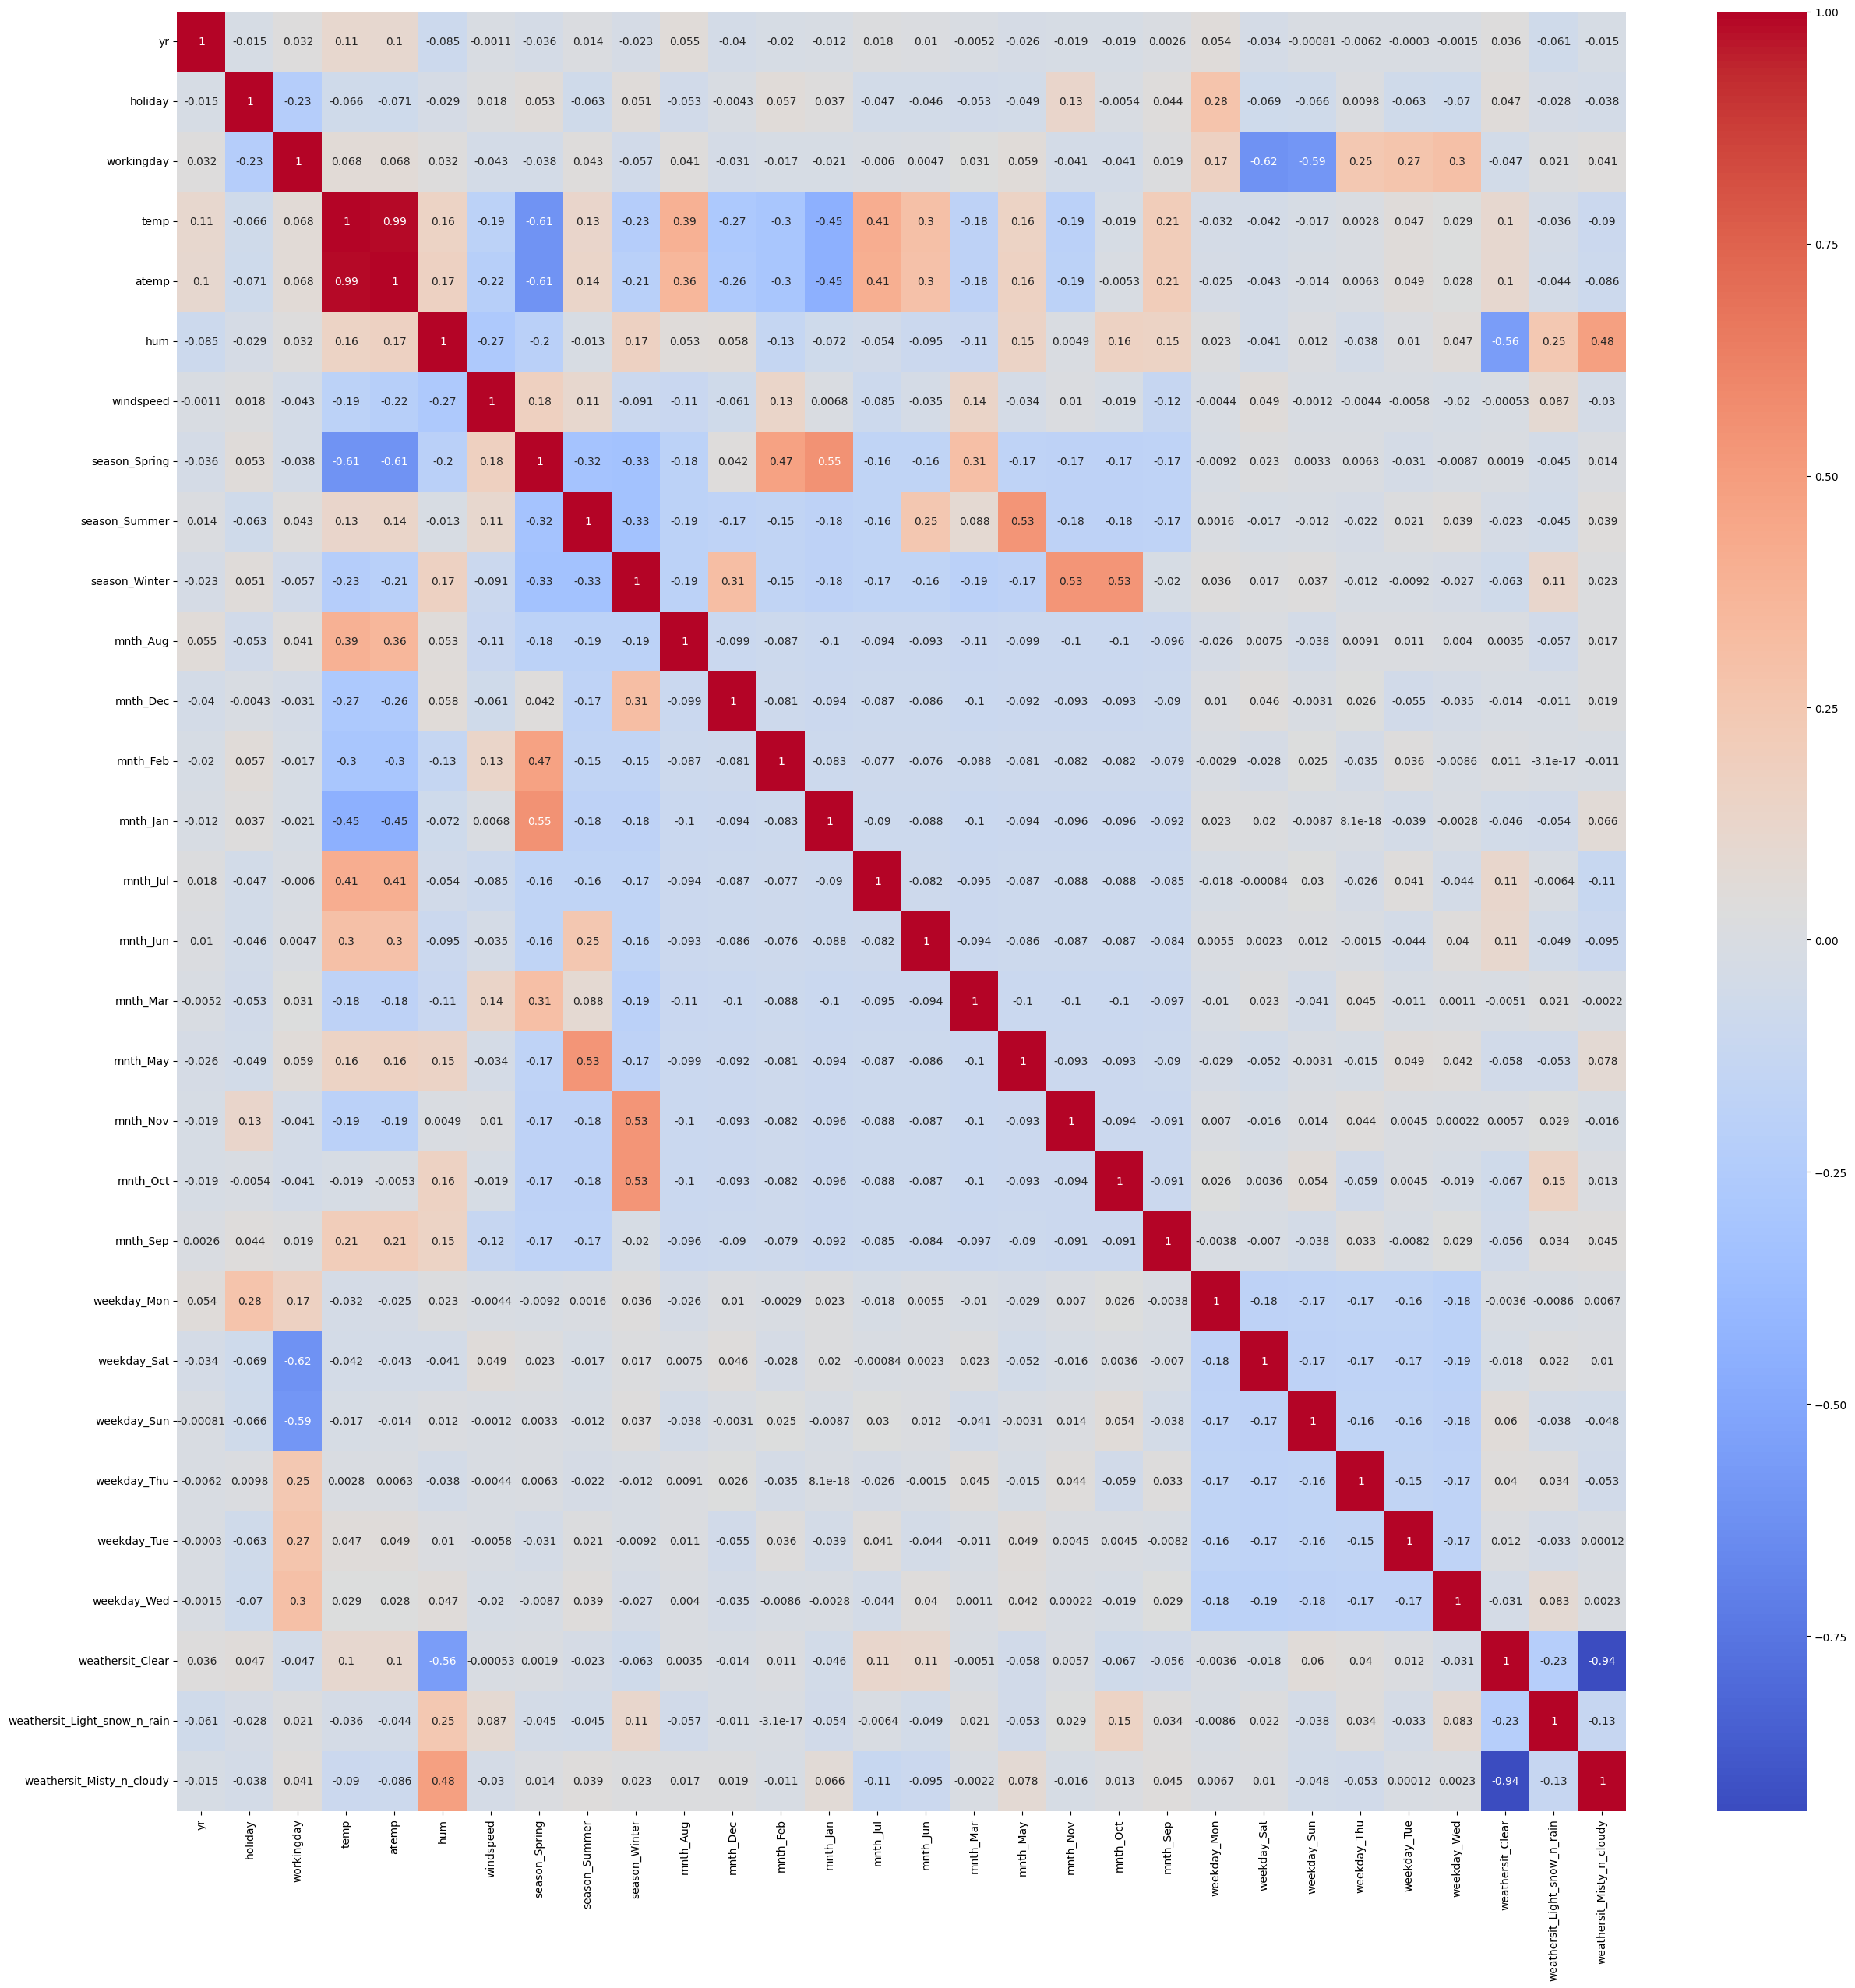

In [30]:
# Checking correlation after scaling
plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(), cmap='coolwarm', annot = True)
plt.show()

# Model Building using RFE

In [31]:
# Creating Linear Regression class object
lr = LinearRegression()
lr.fit(X_train,y_train)

# Cut down number of features to 15 using recursive feature elimination
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)
RFE(estimator=LinearRegression(), n_features_to_select=15)

# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 14),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_snow_n_rain', True, 1),
 ('weathersit_Misty_n_cloudy', True, 1)]

In [32]:
#Function to build a statsmodel api model

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [33]:
#Function to calculate VIFs
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [34]:
# Checking which columns are supported by rfe
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain',
       'weathersit_Misty_n_cloudy'],
      dtype='object')

In [35]:
# Considering columns which are supported by rfe
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain',
       'weathersit_Misty_n_cloudy']]

X_train_rfe.shape

(510, 15)

##Model-1

In [36]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain',
       'weathersit_Misty_n_cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.81e-190
Time:                        14:50:09   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##Model-2

In [37]:
# Dropping the 'holiday' column due to high P and VIF value
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain',
       'weathersit_Misty_n_cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.81e-190
Time:                        14:50:09   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##Model-3

In [39]:
# Dropping 'weathersit_Misty_n_cloudy' due to high VIF and checking if the VIF values change after removing this variable
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.81e-190
Time:                        14:54:50   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##Model-4

In [41]:
# Dropping 'hum' due to high VIF and checking if model accuracy improves and VIF of other variables reduces
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.38e-188
Time:                        15:00:45   Log-Likelihood:                -4122.0
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     497   BIC:                             8325.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##Model-5

In [42]:
# Dropping 'temp' and putting back 'hum' to experiment if the accuracy increases
cols = ['yr', 'workingday', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     135.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.94e-148
Time:                        15:02:04   Log-Likelihood:                -4216.9
No. Observations:                 510   AIC:                             8460.
Df Residuals:                     497   BIC:                             8515.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##Model-6

In [43]:
# Bringing back 'temp' variable as R2 significantly reduced
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.38e-188
Time:                        15:03:41   Log-Likelihood:                -4122.0
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     497   BIC:                             8325.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##Model-7

In [44]:
# Experimenting by removing 'mnth_jul' as 'season_Sprint' is better and covers more no. of months
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.13e-185
Time:                        15:10:01   Log-Likelihood:                -4130.6
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     498   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##Model-8

In [46]:
# Removing the 'workday' column due to high VIF
cols = ['yr', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.06e-186
Time:                        15:10:59   Log-Likelihood:                -4130.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     498   BIC:                             8335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##Model-9 (Finalized model due to low VIF and Low P value)

In [47]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light_snow_n_rain',
       'weathersit_Misty_n_cloudy'],
      dtype='object')

In [81]:
# Adding mnth_Nov
cols_final = ['yr', 'holiday','temp', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jan', 'mnth_Jul',
        'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weathersit_Clear', 'weathersit_Light_snow_n_rain']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.23e-185
Time:                        16:03:11   Log-Likelihood:                -4125.1
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#8. Building Final Model using sklearn

In [87]:
lr1 = LinearRegression()
X_train=X_train[cols_final]
lr1.fit(X_train,y_train)
print(lr.intercept_,lr.coef_)

-3.1004141939536044e+16 [ 2.01834842e+03  2.56309306e+16  2.56309306e+16  3.20249942e+03
  6.56641612e+02 -1.38782989e+03 -1.57733753e+03 -3.81270896e+02
  3.94860130e+02  9.25568320e+02  2.37785483e+02 -3.90303913e+02
 -2.97304899e+02 -5.39961175e+02 -2.53527340e+02  9.73418951e+00
 -3.98359429e+01  2.11000000e+02 -3.31250000e+02  1.05000000e+02
  7.65312500e+02 -2.09000000e+02  2.56309306e+16  2.56309306e+16
 -1.01750000e+02 -2.07046875e+02 -7.96562500e+01  5.37321132e+15
  5.37321132e+15  5.37321132e+15]


#9. Residual Analysis

In [101]:
# Getting the model prediction based on the final columns selected
y_train_pred = lr1.predict(X_train[cols_final])

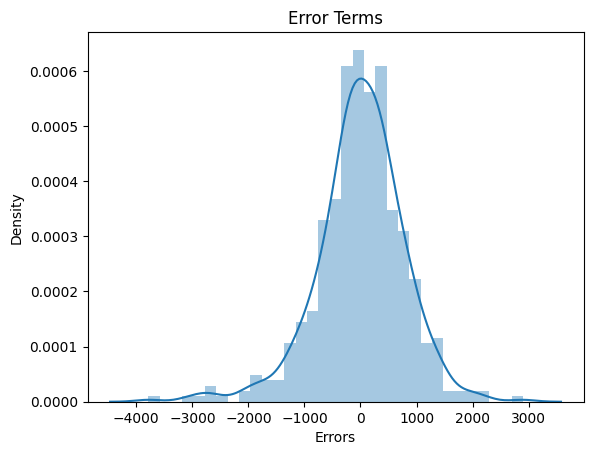

In [102]:
#Plot a histogram of the error terms
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

###We can observe that the error terms are centered around zero. This satisfies one of the assumptions of the Linear Regression Model.

In [105]:
# Getting R2 value
r2_score(y_train,y_train_pred)

0.8367706647903115